## Fetching dataset

In [1]:
import sklearn

In [28]:
import numpy as np

In [3]:
import pandas 

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1)

/Users/loveleenkaur/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X[0]

KeyError: 0

In [9]:
X.to_numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X[0]

KeyError: 0

In [11]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
df = X.to_numpy()

In [13]:
print(type(df))

<class 'numpy.ndarray'>


In [14]:
df[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [15]:
df.shape

(70000, 784)

In [16]:
y.shape

(70000,)

In [17]:
y[0]

'5'

In [18]:
%matplotlib inline

In [19]:
import matplotlib
import matplotlib.pyplot as plt

In [22]:
some_digit = df[36001]
some_digit_image = some_digit.reshape(28,28)

## there is need to reshape this data because the original dataset has been compacted to just one straight line instead of 28 rows and 28 columns , the dataset has 784 boxes all in one straight line

(-0.5, 27.5, 27.5, -0.5)

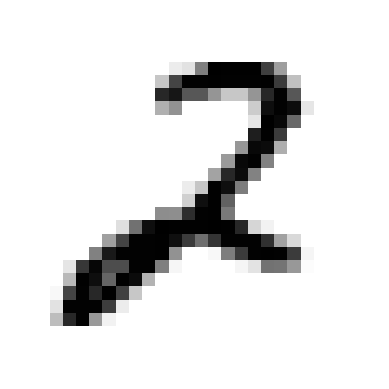

In [24]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,interpolation = "nearest")
plt.axis("off")

In [25]:
df_train =df[:60000]

In [26]:
df_test = df[60000:]

In [27]:
y_train,y_test =y[:60000],y[60000:]

## we wanna make sure that our training and test sets contain mix of numbers,it shouldn't be like that our training models contains 1 from 0:10000 ,2 from 10000:20000 and so on . We will never have a 9 in the training set and our test set will be confused 

## hence, we will shuffle the training set

In [29]:
shuffle_index = np.random.permutation(60000)
df_train ,y_train = df_train[shuffle_index],y_train[shuffle_index]

## <b><I>  creating a detector for digit 2,we also need to convert strings into digits</I></b>

In [44]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test ==2)

In [37]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [38]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression(tol = 0.1,solver = "lbfgs") ##tol for faster processing

In [55]:
clf.fit(df_train,y_train_2)

/Users/loveleenkaur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

## we are not increasing number of iterations because it will take time

In [49]:
clf.predict([some_digit])

array([ True])

## cross-validation

In [56]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,df_train,y_train_2,cv =3,scoring ="accuracy")

/Users/loveleenkaur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/loveleenkaur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [57]:
a.mean()

0.9783833333333334

## Is it giving me 97% accuracy?

## accuracy is not a good metric for evaluating a classifier